# Install

In [2]:
!pip install git+https://github.com/cmudrc/drcutils -qqq

     |████████████████████████████████| 452 kB 5.3 MB/s 
     |████████████████████████████████| 13.8 MB 64.0 MB/s 
     |████████████████████████████████| 182 kB 55.7 MB/s 
     |████████████████████████████████| 1.5 MB 63.7 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 132 kB 56.9 MB/s 
     |████████████████████████████████| 212 kB 72.8 MB/s 
     |████████████████████████████████| 127 kB 77.8 MB/s 
     |████████████████████████████████| 278 kB 61.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 2.3 MB 69.0 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 106 kB 60.2 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |██████████████████████

In [3]:
from drcutils.plotting_stack import *

# Visualize brand colors

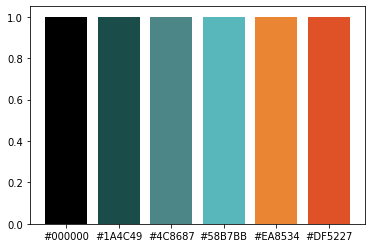

In [4]:
matplotlib.pyplot.bar([1, 2, 3, 4, 5, 6], [1, 1, 1, 1, 1, 1], color=COLORS, tick_label=COLORS);

# Load brand logo variants

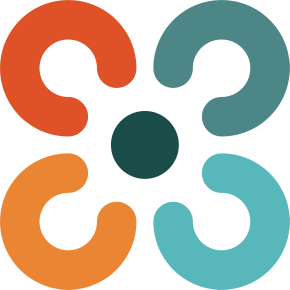

In [12]:
logo_only.IMAGE_OBJECT.reduce(10)

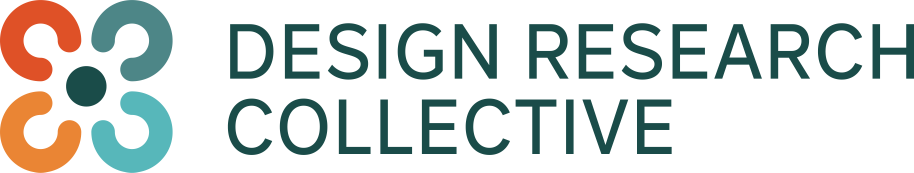

In [11]:
horizontal_logo.IMAGE_OBJECT.reduce(10)

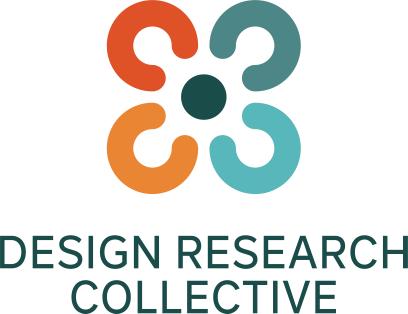

In [13]:
stacked_logo.IMAGE_OBJECT.reduce(10)

# Show colormaps

In [15]:
import numpy
X = numpy.arange(-5, 5, 0.25)
Y = numpy.arange(-5, 5, 0.25)
X, Y = numpy.meshgrid(X, Y)
R = numpy.sqrt(X**2 + Y**2)
Z = numpy.sin(R)

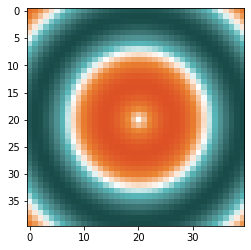

In [19]:
matplotlib.pyplot.imshow(Z, cmap=diverging_hamster_colormap)

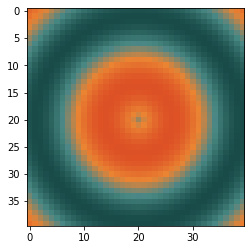

In [20]:
matplotlib.pyplot.imshow(Z, cmap=hamster_colormap)

# Load STL Logo

In [ ]:
import plotly.graph_objects
import numpy

def plot_mesh(stl_mesh):
    # stl_mesh is read by nympy-stl from a stl file; it is  an array of faces/triangles (i.e. three 3d points) 
    # this function extracts the unique vertices and the lists I, J, K to define a Plotly mesh3d
    p, q, r = stl_mesh.vectors.shape #(p, 3, 3)
    # the array stl_mesh.vectors.reshape(p*q, r) can contain multiple copies of the same vertex;
    # extract unique vertices from all mesh triangles
    vertices, ixr = numpy.unique(stl_mesh.vectors.reshape(p*q, r), return_inverse=True, axis=0)
    I = numpy.take(ixr, [3*k for k in range(p)])
    J = numpy.take(ixr, [3*k+1 for k in range(p)])
    K = numpy.take(ixr, [3*k+2 for k in range(p)])
    x, y, z = vertices.T
    colorscale= [[0, COLORS[2]], [1, COLORS[2]]]  

    mesh3D = plotly.graph_objects.Mesh3d(
            x=x,
            y=y,
            z=z, 
            i=I, 
            j=J, 
            k=K, 
            flatshading=True,
            colorscale=colorscale, 
            intensity=z, 
            showscale=False) 
    layout = plotly.graph_objects.Layout(
            scene_xaxis_visible=False,
            scene_yaxis_visible=False,
            scene_zaxis_visible=False,
            scene_aspectmode="data"
            )
    fig = plotly.graph_objects.Figure(data=[mesh3D], layout=layout)
    fig.data[0].update(lighting=dict(ambient= 0.18,
                                 diffuse= 1,
                                 fresnel=  .1,
                                 specular= 1,
                                 roughness= .1,
                                 facenormalsepsilon=0))
    return fig

In [ ]:
plot_mesh(logo_only.MESH_OBJECT)